NOTE: This analysis uses pickle to save dataframes. I am aware of the security risks with pickle and not being able to use the file outside of python. However, this analysis was done locally so the security risks were not a factor all analysis was done in python.  If either was not the case I would have converted to JSON instead. I used pickle because it's easy and fast.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

#from matplotlib import style
#Seaborn's visual styling was inspired by ggplot, change matplotlib plot style to match
#style.use('ggplot')

# Data Fields

** About the Data **  
This dataset includes all valid felony, misdemeanor, and violation crimes reported to the New York City Police Department (NYPD) from 2006 to the end of last year (2016). 

CMPLNT_NUM: Number (9 digits)
Randomly generated persistent ID for each complaint

CMPLNT_FR_DT:  Date & Time  (date)
Exact date of occurrence for the reported event (or starting
date of occurrence, if CMPLNT_TO_DT exists)

CMPLNT_FR_TM: Plain Text 
Exact time of occurrence for the reported event (or starting
time of occurrence, if CMPLNT_TO_TM exists)

CMPLNT_TO_DT: Date & Time  
Ending date of occurrence for the reported event, if exact
time of occurrence is unknown

CMPLNT_TO_TM: Plain Text  
Ending time of occurrence for the reported event, if exact
time of occurrence is unknown

RPT_DT: Date & Time  
Date event was reported to police 

KY_CD: Number  
Three digit offense classification code

OFNS_DESC: Plain Text  
Description of offense corresponding with key code

PD_CD: Number  
Three digit internal classification code (more granular than
Key Code)

PD_DESC: Plain Text  
Description of internal classification corresponding with PD
code (more granular than Offense Description)

CRM_ATPT_CPTD_CD: Plain Text
Indicator of whether crime was successfully completed or
attempted, but failed or was interrupted prematurely

LAW_CAT_CD: Plain Text  
Level of offense: felony, misdemeanor, violation

JURIS_DESC: Plain Text  
Jurisdiction responsible for incident. Either internal, like
Police, Transit, and Housing; or external, like Correction,
Port Authority, etc.

BORO_NM: Plain Text  
The name of the borough in which the incident occurred

ADDR_PCT_CD: Number
The precinct in which the incident occurred

LOC_OF_OCCUR_DESC: Plain Text  
Specific location of occurrence in or around the premises;
inside, opposite of, front of, rear of

PREM_TYP_DESC: Plain Text  
Specific description of premises; grocery store, residence,
street, etc.

PARKS_NM: Plain Text  
Name of NYC park, playground or greenspace of
occurrence, if applicable (state parks are not included)

HADEVELOPT: Plain Text  
Name of NYCHA housing development of occurrence, if applicable

X_COORD_CD: Number  
X-coordinate for New York State Plane Coordinate System,
Long Island Zone, NAD 83, units feet (FIPS 3104)

Y_COORD_CD: Number 
Y-coordinate for New York State Plane Coordinate System,
Long Island Zone, NAD 83, units feet (FIPS 3104)

Latitude: Number 
Latitude coordinate for Global Coordinate System, WGS
1984, decimal degrees (EPSG 4326)

Longitude: Number  
Longitude coordinate for Global Coordinate System, WGS
1984, decimal degrees (EPSG 4326)

Lat_Lon	: Location  

# Import the Data

In [3]:
#open and read the file into a pandas data frame
filename = "C:/Users/Stacey/Downloads/NYPD_Complaint_Data_Historic.csv"

In [4]:
#view the header names
list(pd.read_csv(filename, nrows=1).columns)

['CMPLNT_NUM',
 'CMPLNT_FR_DT',
 'CMPLNT_FR_TM',
 'CMPLNT_TO_DT',
 'CMPLNT_TO_TM',
 'RPT_DT',
 'KY_CD',
 'OFNS_DESC',
 'PD_CD',
 'PD_DESC',
 'CRM_ATPT_CPTD_CD',
 'LAW_CAT_CD',
 'JURIS_DESC',
 'BORO_NM',
 'ADDR_PCT_CD',
 'LOC_OF_OCCUR_DESC',
 'PREM_TYP_DESC',
 'PARKS_NM',
 'HADEVELOPT',
 'X_COORD_CD',
 'Y_COORD_CD',
 'Latitude',
 'Longitude',
 'Lat_Lon']

In [5]:
#set the columns to read in
columns = ['CMPLNT_NUM',
 'CMPLNT_FR_DT',
 'CMPLNT_FR_TM',
 'CMPLNT_TO_DT', #use the from date only to limit file import size
 'CMPLNT_TO_TM', #use the from date only to limit file import size
 'RPT_DT',
 'KY_CD',
 'OFNS_DESC',
 'PD_CD',
 'PD_DESC',
 'CRM_ATPT_CPTD_CD',
 'LAW_CAT_CD',
 'JURIS_DESC',
 'BORO_NM',
 'ADDR_PCT_CD',
 'LOC_OF_OCCUR_DESC',
 'PREM_TYP_DESC',
 'PARKS_NM',
 'HADEVELOPT',
 #'X_COORD_CD',  use lat and lon instead
 #'Y_COORD_CD',  use lat and lon instead
 'Latitude',
 'Longitude'
 #'Lat_Lon'
 ]

In [6]:
#identify the date columns
#parse_dates = ['CMPLNT_FR_DT','CMPLNT_FR_TM','RPT_DT']

parse_dates = ['CMPLNT_FR_DT','CMPLNT_FR_TM','CMPLNT_TO_DT',
               'CMPLNT_TO_TM','RPT_DT']

In [7]:
#Set up datatypes, use category for strings where possible, 
#more memory efficient than object (str)
dtypes = {
 'CMPLNT_NUM': 'str',
 'CMPLNT_FR_DT': 'str',
 'CMPLNT_FR_TM': 'str',
 'CMPLNT_TO_DT': 'str', #use from date only
 'CMPLNT_TO_TM': 'str', #use from time only
 'RPT_DT': 'str',
 'KY_CD': 'uint16',
 'OFNS_DESC': 'category',
 'PD_CD': 'float',  #missing values so can't be 'uint16'
 'PD_DESC': 'category',
 'CRM_ATPT_CPTD_CD': 'category',
 'LAW_CAT_CD': 'category',
 'JURIS_DESC': 'category',
 'BORO_NM': 'category',
 'ADDR_PCT_CD': 'float', #missing values so can't be 'uint16'
 'LOC_OF_OCCUR_DESC': 'category',
 'PREM_TYP_DESC': 'category',
 'PARKS_NM': 'category',
 'HADEVELOPT': 'category',
 #'X_COORD_CD': 'float', #missing values so can't be 'int',
 #'Y_COORD_CD': 'float', #missing values so can't be 'int',
 'Latitude': 'float',
 'Longitude': 'float'
 #'Lat_Lon'
}

In [ ]:
#read in the file
a = datetime.datetime.now()
df = pd.read_csv(filename, usecols = columns, 
                 dtype = dtypes,  parse_dates = parse_dates)
#print(datetime.datetime.now() - a)


In [ ]:
df

In [ ]:
#write the dataframe to a file so it's easier to read in
df.to_pickle('C:/Users/Stacey/Downloads/NY_complaint_data.pkl')

In [8]:
#check and read data in from pickle file
df_orig = pd.read_pickle('C:/Users/Stacey/Downloads/NY_complaint_data.pkl')

In [10]:
df = df_orig
df.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,LAW_CAT_CD,JURIS_DESC,BORO_NM,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,Latitude,Longitude
0,101109527,12/31/2015,23:45:00,NaT,nan,2015-12-31,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,FELONY,N.Y. POLICE DEPT,BRONX,44.0,INSIDE,BAR/NIGHT CLUB,NaN,NaN,40.828848,-73.916661
1,153401121,12/31/2015,23:36:00,NaT,nan,2015-12-31,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,...,FELONY,N.Y. POLICE DEPT,QUEENS,103.0,OUTSIDE,NaN,NaN,NaN,40.697338,-73.784557
2,569369778,12/31/2015,23:30:00,NaT,nan,2015-12-31,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",...,FELONY,N.Y. POLICE DEPT,MANHATTAN,28.0,NaN,OTHER,NaN,NaN,40.802607,-73.945052
3,968417082,12/31/2015,23:30:00,NaT,nan,2015-12-31,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,MISDEMEANOR,N.Y. POLICE DEPT,QUEENS,105.0,INSIDE,RESIDENCE-HOUSE,NaN,NaN,40.654549,-73.726339
4,641637920,12/31/2015,23:25:00,2015-12-31,23:30:00,2015-12-31,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,MISDEMEANOR,N.Y. POLICE DEPT,MANHATTAN,13.0,FRONT OF,OTHER,NaN,NaN,40.738002,-73.987891


** Data Cleaning **  
check for errors, deal with special values, convert data into different formats, and perform calculations  

In [11]:
#check that complaint number is actually unique
len(df.CMPLNT_NUM.unique()), len(df)

(5580035, 5580035)

In [12]:
df.dtypes

CMPLNT_NUM                   object
CMPLNT_FR_DT                 object
CMPLNT_FR_TM                 object
CMPLNT_TO_DT         datetime64[ns]
CMPLNT_TO_TM                 object
RPT_DT               datetime64[ns]
KY_CD                        uint16
OFNS_DESC                  category
PD_CD                       float64
PD_DESC                    category
CRM_ATPT_CPTD_CD           category
LAW_CAT_CD                 category
JURIS_DESC                 category
BORO_NM                    category
ADDR_PCT_CD                 float64
LOC_OF_OCCUR_DESC          category
PREM_TYP_DESC              category
PARKS_NM                   category
HADEVELOPT                 category
Latitude                    float64
Longitude                   float64
dtype: object

In [13]:
#view dates reported
df.RPT_DT.dt.year.value_counts(sort=False)

2006    539977
2007    538380
2008    530034
2009    513056
2010    509728
2011    498576
2012    504341
2013    497242
2014    491319
2015    478578
2016    478804
Name: RPT_DT, dtype: int64

In [14]:
#view from dates
df.CMPLNT_FR_DT.str[-4:].value_counts()
#this field has missing and unusual values

2006    539084
2007    537242
2008    528744
2009    511014
2010    509853
2012    504334
2011    498381
2013    495304
2014    491131
2015    477031
2016    468290
2005     10797
2004      2116
2003      1547
2002      1047
2001      1008
2000       908
nan        655
1999       342
1998       224
1997       134
1996       122
1995        75
1994        64
1993        46
1992        45
1990        35
1986        30
1991        29
1966        27
         ...  
1970         6
1976         5
1965         5
1900         5
1026         5
1971         3
1908         3
1909         3
1955         3
1950         3
1962         3
1954         2
1941         2
1946         2
1959         2
1945         2
1905         2
1942         2
1919         1
1958         1
1906         1
1922         1
1948         1
1961         1
1956         1
1929         1
1930         1
1964         1
1938         1
1940         1
Name: CMPLNT_FR_DT, Length: 90, dtype: int64

In [15]:
#date of occurrence of event on or after 2016
sum(df.CMPLNT_FR_DT.str[-4:].dropna().astype(float) >= 2006)

5560408

** Clean the CMPLNT_FR_DT field - has NA values and unusual values **  
Clean and convert to date type
CMPLNT_FR_DT: Exact date of occurrence for the reported event (or starting date of occurrence, if CMPLNT_TO_DT exists)

In [16]:
#view unique values
df.CMPLNT_FR_DT.str[-4:].unique()

array(['2015', '2013', '2009', '2014', '2011', '2004', '2012', '1992',
       '1969', '2010', '1979', '2008', '2006', '2007', '2005', '2001',
       '1982', '1015', '1995', '1993', '1965', '2000', '2002', '1990',
       '1999', '1996', '2003', '1987', '1975', '1989', '1915', '1986',
       'nan', '1981', '1950', '1998', '1978', '1997', '1910', '1991',
       '1955', '1914', '1958', '1994', '1974', '1977', '1980', '1930',
       '1988', '1913', '1941', '1945', '1954', '1971', '1973', '1985',
       '1912', '1972', '1984', '1942', '1983', '1920', '1968', '1938',
       '1911', '1970', '1959', '1909', '1960', '1940', '1900', '1929',
       '1976', '1919', '1908', '1948', '1967', '1962', '1966', '1956',
       '1922', '1906', '1946', '1961', '1905', '1964', '2016', '1916',
       '1016', '1026'], dtype=object)

In [17]:
#get the % of observations where the year is 2006 or greater
sum(df.CMPLNT_FR_DT.str[-4:].astype(float) >= 2006) / len(df)

0.99648263854975816

**Fewer than 1% of observations have complaint prior to 2006 so these will be excluded from the analysis **

In [18]:
#Convert all observations where year is greater than 2006
#to a date and the rest set to 1/1/1900 so they can be easily 
#identified and excluded

#get all values into a format that can be converted to a date
df['CMPLNT_FR_DATE'] = np.where(
    df.CMPLNT_FR_DT.str[-4:].astype(float) >= 2006, 
    df.CMPLNT_FR_DT,
    '01/01/1900')

In [19]:
#add a new column and convert to a date format
df['CMPLNT_FR_DATE'] = pd.to_datetime(df.CMPLNT_FR_DATE,format="%m/%d/%Y")

** Create a subset of the dataframe excluding events that occurred prior to 2006 **

In [20]:
#subset dataframe to valid dates only
df2 = df[df.CMPLNT_FR_DATE.dt.year >= 2006].copy()
len(df2)

5560408

In [21]:
#check the data types
df2.dtypes

CMPLNT_NUM                   object
CMPLNT_FR_DT                 object
CMPLNT_FR_TM                 object
CMPLNT_TO_DT         datetime64[ns]
CMPLNT_TO_TM                 object
RPT_DT               datetime64[ns]
KY_CD                        uint16
OFNS_DESC                  category
PD_CD                       float64
PD_DESC                    category
CRM_ATPT_CPTD_CD           category
LAW_CAT_CD                 category
JURIS_DESC                 category
BORO_NM                    category
ADDR_PCT_CD                 float64
LOC_OF_OCCUR_DESC          category
PREM_TYP_DESC              category
PARKS_NM                   category
HADEVELOPT                 category
Latitude                    float64
Longitude                   float64
CMPLNT_FR_DATE       datetime64[ns]
dtype: object

** Add a column for year and month **

In [22]:
#add a column for year
df2['CMPLNT_FR_DATE_YEAR'] = df2.CMPLNT_FR_DATE.dt.year

In [23]:
#column for month
df2['CMPLNT_FR_DATE_MONTH'] = df2.CMPLNT_FR_DATE.dt.month

** Check precinct by borough, this should be unique **

In [24]:
check_precinct = df2[['ADDR_PCT_CD','BORO_NM','CMPLNT_NUM'
   ]].groupby(['ADDR_PCT_CD','BORO_NM',]).agg(['count'])
#reformat headers
check_precinct.columns = ['_'.join(tup).rstrip('_') for tup in check_precinct.columns.values]
check_precinct.reset_index(col_level=1,inplace = True)
check_precinct.head(10)

,ADDR_PCT_CD,BORO_NM,CMPLNT_NUM_count
0,1.0,MANHATTAN,67593
1,5.0,MANHATTAN,49213
2,6.0,MANHATTAN,59401
3,7.0,BROOKLYN,1
4,7.0,MANHATTAN,45127
5,9.0,BROOKLYN,1
6,9.0,MANHATTAN,67630
7,10.0,MANHATTAN,47218
8,13.0,BROOKLYN,1
9,13.0,MANHATTAN,80916


There are either errors in the borough or in the precinct numbers for some entries, as a precinct can only be in one borough

In [25]:
#get borough with the highest count for each precinct
precinct_by_boro = check_precinct.sort_values(
    ['ADDR_PCT_CD','CMPLNT_NUM_count'],
    ascending = [True,False]).groupby(
    'ADDR_PCT_CD',as_index=False).first()[['ADDR_PCT_CD','BORO_NM']]

In [26]:
#confirm unique
len(precinct_by_boro), len(precinct_by_boro.ADDR_PCT_CD.unique())

(77, 77)

In [27]:
#set the idex to the precinct number and drop the precinct column
precinct_by_boro.index = precinct_by_boro.ADDR_PCT_CD
precinct_by_boro.drop('ADDR_PCT_CD',axis=1,inplace=True)

In [28]:
#create a new Boro column and map the precinct to the correct Boro
df2['BORO'] = pd.Series(df2.ADDR_PCT_CD).map(precinct_by_boro.BORO_NM)

In [29]:
#change all na precincts to zero then convert to int
df2['ADDR_PCT_CD'] = df2.ADDR_PCT_CD.fillna(0)
#convert to integer
df2['ADDR_PCT_CD'] = df2.ADDR_PCT_CD.astype(int)

In [30]:
#view the column
df2.ADDR_PCT_CD.head()

0     44
1    103
2     28
3    105
4     13
Name: ADDR_PCT_CD, dtype: int32

In [31]:
df2.dtypes

CMPLNT_NUM                      object
CMPLNT_FR_DT                    object
CMPLNT_FR_TM                    object
CMPLNT_TO_DT            datetime64[ns]
CMPLNT_TO_TM                    object
RPT_DT                  datetime64[ns]
KY_CD                           uint16
OFNS_DESC                     category
PD_CD                          float64
PD_DESC                       category
CRM_ATPT_CPTD_CD              category
LAW_CAT_CD                    category
JURIS_DESC                    category
BORO_NM                       category
ADDR_PCT_CD                      int32
LOC_OF_OCCUR_DESC             category
PREM_TYP_DESC                 category
PARKS_NM                      category
HADEVELOPT                    category
Latitude                       float64
Longitude                      float64
CMPLNT_FR_DATE          datetime64[ns]
CMPLNT_FR_DATE_YEAR              int64
CMPLNT_FR_DATE_MONTH             int64
BORO                            object
dtype: object

Check for number of precints that are 0

In [39]:
round(sum(df2.ADDR_PCT_CD == 0) / (len(df2) * 1.0),4)

0.0001

0.01% of observations have a blank precinct, so those will be dropped from the dataset

** Subset the dataframe to only include observations with a precinct number **

In [41]:
df3 = df2[df2.ADDR_PCT_CD != 0].copy()

** Rename field names **

In [42]:
df3.rename(columns={'ADDR_PCT_CD': 'PRECINCT'}, inplace = True)

** Create combined fields for visualization **

In [43]:
#create combined field with 'LAW_CAT_CD' and 'OFNS_DESC'
cat = df3.LAW_CAT_CD.astype(str)
ofns = df3.OFNS_DESC.astype(str)

In [44]:
df3['CAT_OFNS'] =  cat + '-' + ofns

In [45]:
#create combined field with 'BORO' and 'PRECINCT'
boros = df3.BORO.astype(str)
precincts = df3.PRECINCT.astype(str)

In [46]:
df3['BORO_PREC'] =  boros + '-' + precincts

In [48]:
df3.shape

(5560057, 27)

In [47]:
df3.dtypes

CMPLNT_NUM                      object
CMPLNT_FR_DT                    object
CMPLNT_FR_TM                    object
CMPLNT_TO_DT            datetime64[ns]
CMPLNT_TO_TM                    object
RPT_DT                  datetime64[ns]
KY_CD                           uint16
OFNS_DESC                     category
PD_CD                          float64
PD_DESC                       category
CRM_ATPT_CPTD_CD              category
LAW_CAT_CD                    category
JURIS_DESC                    category
BORO_NM                       category
PRECINCT                         int32
LOC_OF_OCCUR_DESC             category
PREM_TYP_DESC                 category
PARKS_NM                      category
HADEVELOPT                    category
Latitude                       float64
Longitude                      float64
CMPLNT_FR_DATE          datetime64[ns]
CMPLNT_FR_DATE_YEAR              int64
CMPLNT_FR_DATE_MONTH             int64
BORO                            object
CAT_OFNS                 

# Visualize the data

** View count plots of all fields to get a sense of the data **

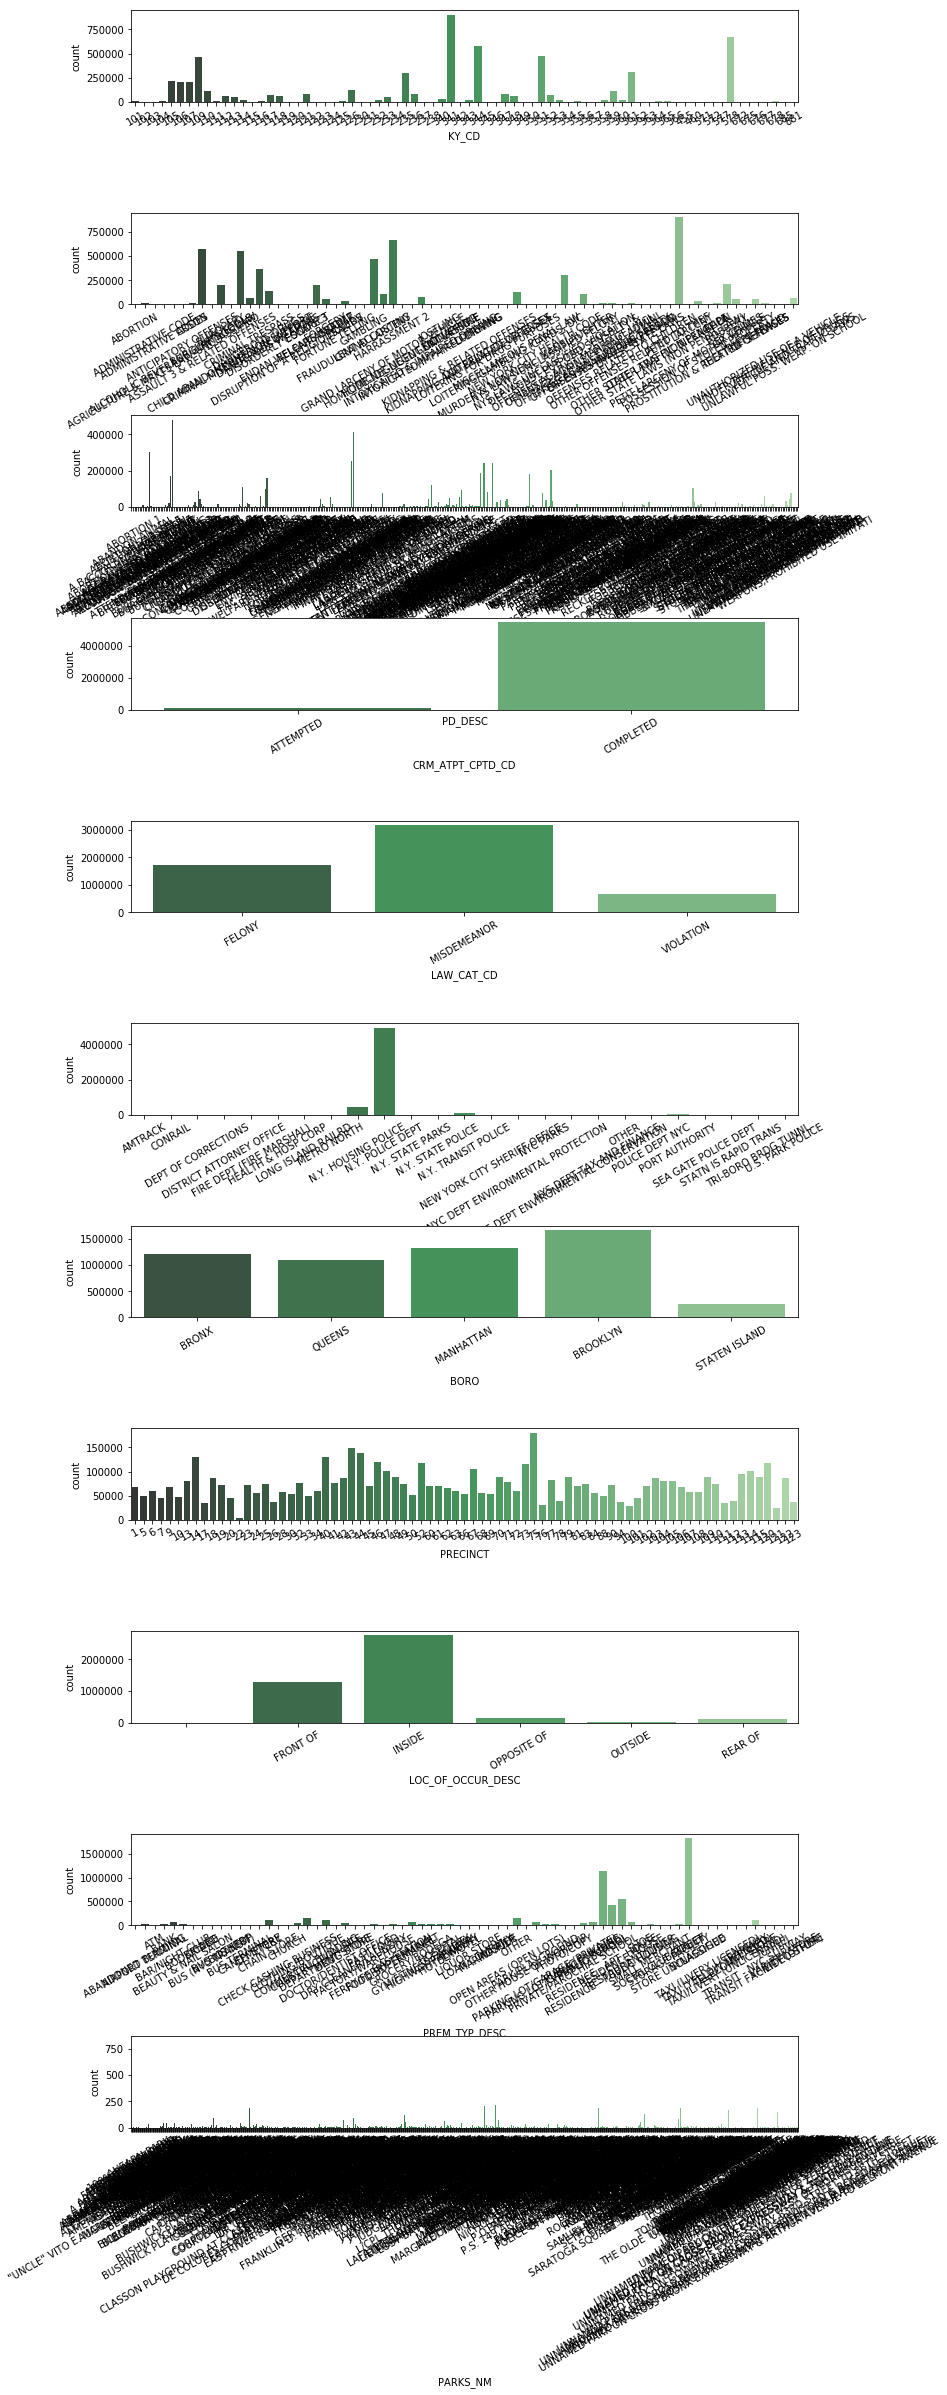

In [49]:
#view count plots, see what the data look
Cols = ['KY_CD','OFNS_DESC','PD_DESC','CRM_ATPT_CPTD_CD','LAW_CAT_CD','JURIS_DESC','BORO',
        'PRECINCT','LOC_OF_OCCUR_DESC','PREM_TYP_DESC','PARKS_NM','HADEVELOPT']
#View histograms
f, axs = plt.subplots(11, 1, figsize=(10, 30))
plt.tight_layout(h_pad=9.0)
for i, ax in enumerate(axs.flat):
    col = Cols[i]
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)
    sns.countplot(x=col, data=df3, palette='Greens_d',ax = ax)

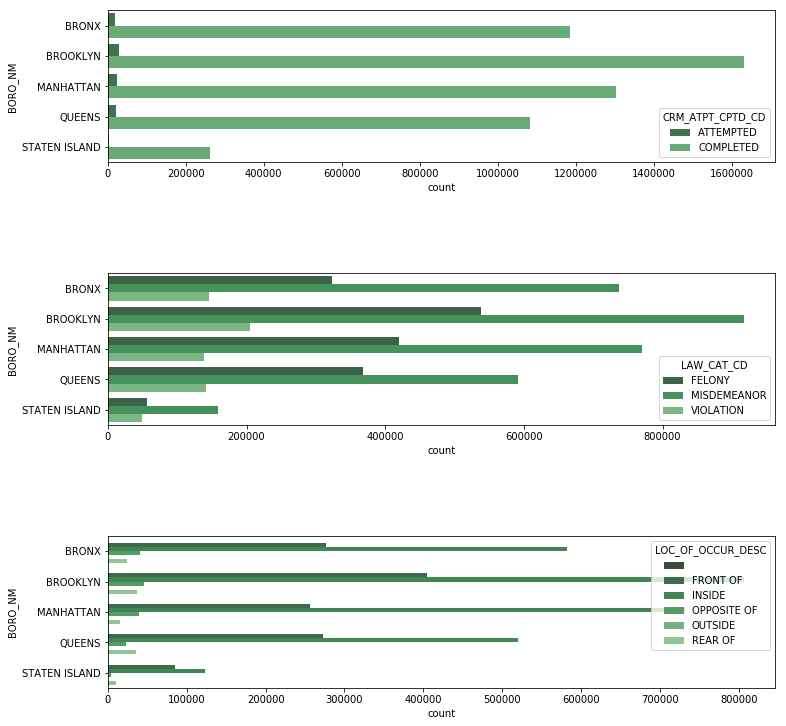

In [50]:
#view count plots by borough for a few of the fields
Cols = ['CRM_ATPT_CPTD_CD','LAW_CAT_CD','LOC_OF_OCCUR_DESC']
#,'HADEVELOPT']
#View histograms
f, axs = plt.subplots(3, 1, figsize=(10, 10))
plt.tight_layout(h_pad=9.0)
for i, ax in enumerate(axs.flat):
    col = Cols[i]
    #ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)
    sns.countplot(y="BORO_NM", hue=col,data=df3, palette='Greens_d',ax = ax)

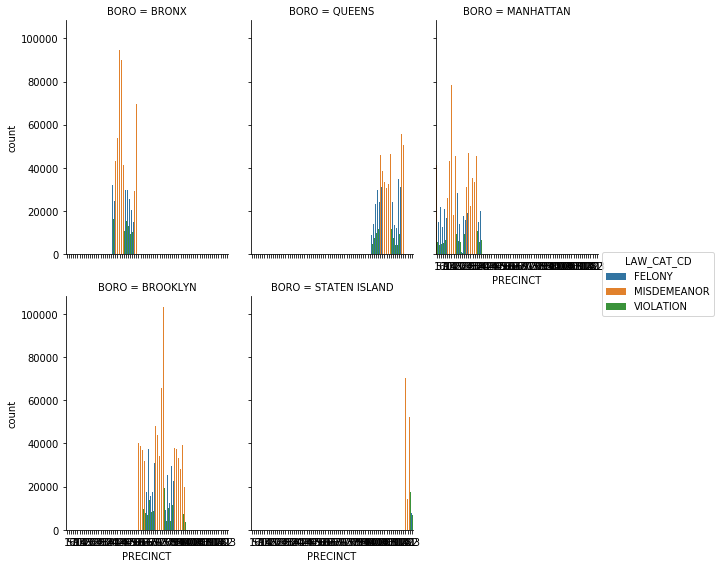

In [51]:
#count plot by precinct by borough 
sns.factorplot(x="PRECINCT", hue="LAW_CAT_CD",
               col="BORO", data=df3, kind="count",size=4, aspect=.7, col_wrap = 3);
#some precincts have a lot of crime some have very little to none, 
#some have mostly or only misdemeanors, and others have felonies

** Output the cleaned file to a dataframe **

In [52]:
#output df3 to a file
df3.to_pickle('C:/Users/Stacey/Downloads/NY_complaint_data_cleaned.pkl')